In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
plt.rcParams.update({'figure.figsize':(6,4),'figure.dpi':60})

In [76]:
pth = r"/Users/christianugwu/Desktop/AQUAFEED DATA Tilapia CURRENT.xlsx"

In [77]:
earthen_data = pd.read_excel(pth, sheet_name='ConcreteData')

In [78]:
earthen_data.head()

,Dissolve_oxygen,Temperature,PH,Feed_intake,Fish_meal,Blood_meal,Palm_kernel_cake,Water_fern,Wheat_meal,Mopane_worm,Soya_bean_meal,Yellow_maize,Soya_bean_oil,Starch,Vitamin,Methionine,Lysine,Groundnut_cake,Weight_gain
0,7.05,26.6,6.40,48.30,10.9,0.0,0,0,0,0,32.8,24.4,6,2,2,0,0,21.9,55.588
1,6.81,26.5,6.52,58.30,10.9,0.0,0,0,0,0,32.8,24.4,6,2,2,0,0,21.9,68.912
2,6.77,26.4,6.78,63.98,10.9,0.0,0,0,0,0,32.8,24.4,6,2,2,0,0,21.9,87.036
3,6.78,26.3,6.79,72.86,10.9,0.0,0,0,0,0,32.8,24.4,6,2,2,0,0,21.9,109.484
4,6.68,26.2,6.69,92.25,10.9,0.0,0,0,0,0,32.8,24.4,6,2,2,0,0,21.9,135.932


In [79]:
earthen_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dissolve_oxygen   39 non-null     float64
 1   Temperature       39 non-null     float64
 2   PH                39 non-null     float64
 3   Feed_intake       39 non-null     float64
 4   Fish_meal         39 non-null     float64
 5   Blood_meal        39 non-null     float64
 6   Palm_kernel_cake  39 non-null     int64  
 7   Water_fern        39 non-null     int64  
 8   Wheat_meal        39 non-null     int64  
 9   Mopane_worm       39 non-null     int64  
 10  Soya_bean_meal    39 non-null     float64
 11  Yellow_maize      39 non-null     float64
 12  Soya_bean_oil     39 non-null     int64  
 13  Starch            39 non-null     int64  
 14  Vitamin           39 non-null     int64  
 15  Methionine        39 non-null     int64  
 16  Lysine            39 non-null     int64  
 17 

In [80]:
earthen_data.describe()

,Dissolve_oxygen,Temperature,PH,Feed_intake,Fish_meal,Blood_meal,Palm_kernel_cake,Water_fern,Wheat_meal,Mopane_worm,Soya_bean_meal,Yellow_maize,Soya_bean_oil,Starch,Vitamin,Methionine,Lysine,Groundnut_cake,Weight_gain
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.0,39.0,39.000000,39.000000,39.000000,39.000000
mean,6.752821,25.907692,6.650256,154.143590,3.633333,10.833333,4.333333,3.000000,6.333333,6.666667,16.600000,25.300000,5.333333,2.0,2.0,3.333333,3.333333,7.300000,192.319692
std,0.091103,0.388915,0.155470,90.642994,5.205480,15.520925,6.208370,4.298102,9.073772,9.551339,13.568617,0.894721,0.477567,0.0,0.0,2.387835,2.387835,10.458716,100.827296
min,6.610000,25.100000,6.300000,48.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.400000,5.000000,2.0,2.0,0.000000,0.000000,0.000000,49.212000
25%,6.680000,25.600000,6.520000,64.590000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.400000,5.000000,2.0,2.0,0.000000,0.000000,0.000000,99.182000
50%,6.730000,25.900000,6.700000,126.060000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,25.000000,5.000000,2.0,2.0,5.000000,5.000000,0.000000,199.040000
75%,6.785000,26.200000,6.775000,229.175000,10.900000,32.500000,13.000000,9.000000,19.000000,20.000000,32.800000,26.500000,6.000000,2.0,2.0,5.000000,5.000000,21.900000,280.540000
max,7.050000,26.600000,6.800000,332.290000,10.900000,32.500000,13.000000,9.000000,19.000000,20.000000,32.800000,26.500000,6.000000,2.0,2.0,5.000000,5.000000,21.900000,365.360000


In [81]:
def boxplot(column):
    sns.boxplot(data= earthen_data,x=earthen_data[f"{column}"])
    plt.title(f"Boxplot of Earthen Data {column}")
    plt.show()

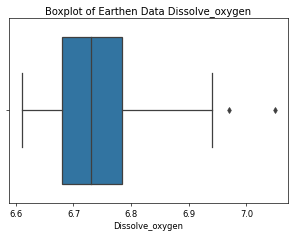

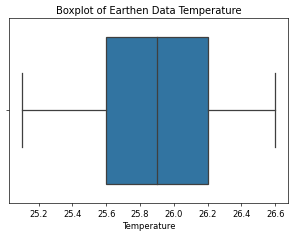

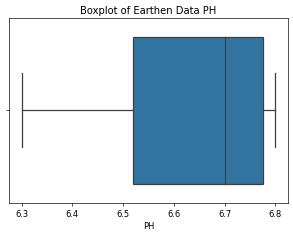

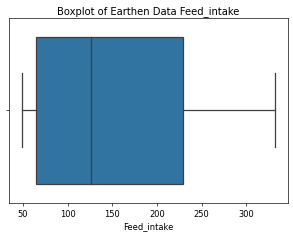

In [82]:
boxplot('Dissolve_oxygen')
boxplot('Temperature')
boxplot('PH')
boxplot('Feed_intake')

In [83]:
def histgram(column):
    #sns.histplot(data2["price"],kde=True)
    sns.histplot(data= earthen_data,x=earthen_data[f"{column}"], kde = True)
    plt.title(f"Histgram plot of Earthen Data {column}")
    plt.show()

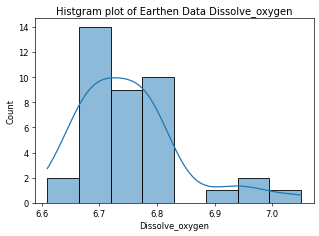

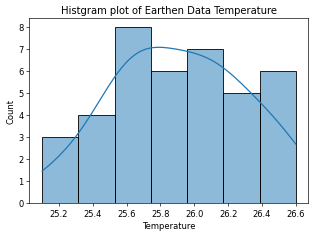

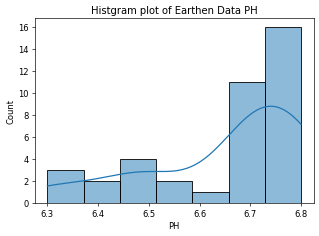

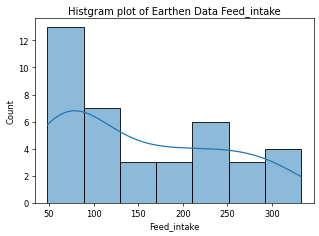

In [84]:
histgram('Dissolve_oxygen')
histgram('Temperature')
histgram('PH')
histgram('Feed_intake')

In [85]:
# skewness along the index axis 
earthen_data.skew(axis = 0, skipna = True) 

Dissolve_oxygen     1.408667
Temperature        -0.024358
PH                 -1.077959
Feed_intake         0.477888
Fish_meal           0.735711
Blood_meal          0.735711
Palm_kernel_cake    0.735711
Water_fern          0.735711
Wheat_meal          0.735711
Mopane_worm         0.735711
Soya_bean_meal     -0.046582
Yellow_maize        0.489357
Soya_bean_oil       0.735711
Starch              0.000000
Vitamin             0.000000
Methionine         -0.735711
Lysine             -0.735711
Groundnut_cake      0.735711
Weight_gain         0.135364
dtype: float64

In [86]:
# Calculate the correlation matrix
correlation_matrix = earthen_data.corr()
correlation_matrix

,Dissolve_oxygen,Temperature,PH,Feed_intake,Fish_meal,Blood_meal,Palm_kernel_cake,Water_fern,Wheat_meal,Mopane_worm,Soya_bean_meal,Yellow_maize,Soya_bean_oil,Starch,Vitamin,Methionine,Lysine,Groundnut_cake,Weight_gain
Dissolve_oxygen,1.000000,0.299433,-0.260353,-0.260956,0.062502,-0.185488,-0.185488,-0.185488,0.122987,0.122987,0.145742,-0.168526,0.062502,NaN,NaN,-0.062502,-0.062502,0.062502,-0.328949
Temperature,0.299433,1.000000,-0.249853,-0.735617,0.212529,0.198361,0.198361,0.198361,-0.410890,-0.410890,-0.000499,0.090752,0.212529,NaN,NaN,-0.212529,-0.212529,0.212529,-0.746369
PH,-0.260353,-0.249853,1.000000,-0.128529,0.020085,0.030718,0.030718,0.030718,-0.050802,-0.050802,-0.007210,0.018162,0.020085,NaN,NaN,-0.020085,-0.020085,0.020085,0.005590
Feed_intake,-0.260956,-0.735617,-0.128529,1.000000,0.088041,-0.044978,-0.044978,-0.044978,-0.043063,-0.043063,0.075872,-0.064207,0.088041,NaN,NaN,-0.088041,-0.088041,0.088041,0.980376
Fish_meal,0.062502,0.212529,0.020085,0.088041,1.000000,-0.500000,-0.500000,-0.500000,-0.500000,-0.500000,0.855273,-0.720577,1.000000,NaN,NaN,-1.000000,-1.000000,1.000000,0.067945
Blood_meal,-0.185488,0.198361,0.030718,-0.044978,-0.500000,1.000000,1.000000,1.000000,-0.500000,-0.500000,-0.876391,0.960769,-0.500000,NaN,NaN,0.500000,0.500000,-0.500000,0.046570
Palm_kernel_cake,-0.185488,0.198361,0.030718,-0.044978,-0.500000,1.000000,1.000000,1.000000,-0.500000,-0.500000,-0.876391,0.960769,-0.500000,NaN,NaN,0.500000,0.500000,-0.500000,0.046570
Water_fern,-0.185488,0.198361,0.030718,-0.044978,-0.500000,1.000000,1.000000,1.000000,-0.500000,-0.500000,-0.876391,0.960769,-0.500000,NaN,NaN,0.500000,0.500000,-0.500000,0.046570
Wheat_meal,0.122987,-0.410890,-0.050802,-0.043063,-0.500000,-0.500000,-0.500000,-0.500000,1.000000,1.000000,0.021118,-0.240192,-0.500000,NaN,NaN,0.500000,0.500000,-0.500000,-0.114515
Mopane_worm,0.122987,-0.410890,-0.050802,-0.043063,-0.500000,-0.500000,-0.500000,-0.500000,1.000000,1.000000,0.021118,-0.240192,-0.500000,NaN,NaN,0.500000,0.500000,-0.500000,-0.114515


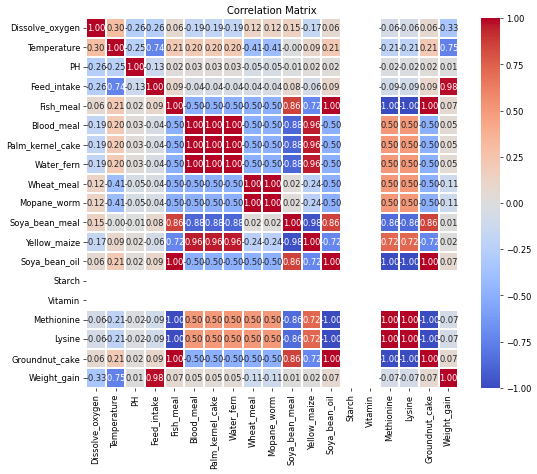

In [87]:
# plotting correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix') 
# displaying heatmap 
plt.show() 

### Descriptive Analysis Inference
1. The highest weight gain is 713.568200.
2. The lowest weight gain is 24.807600.
3. The total number of observations is 39 with no missing value.
4. Most of the weight fall in the range of 0 to 100.
5. Average weight is 330.02.
6. The temperature range from 25 to 27 and the median was 26.4
7. Most of the temperature fall in the range of 26.4 and 26.7.
8. From above box plot its clear that there is no outlier in 'Weight_gain'  and 'temperature' data
9. There is high correlation between weight_gain and feed intake which is 0.9997.
10. The highest feed intake was 747.57 and the lowest was 34.8
11. Average dissolve oxygen was 5.13, the highest was 5.61 and lowest was 4.31

### Predictive Analysis

In [88]:
features = earthen_data.drop(['Weight_gain'], axis =1)
features.head()

,Dissolve_oxygen,Temperature,PH,Feed_intake,Fish_meal,Blood_meal,Palm_kernel_cake,Water_fern,Wheat_meal,Mopane_worm,Soya_bean_meal,Yellow_maize,Soya_bean_oil,Starch,Vitamin,Methionine,Lysine,Groundnut_cake
0,7.05,26.6,6.40,48.30,10.9,0.0,0,0,0,0,32.8,24.4,6,2,2,0,0,21.9
1,6.81,26.5,6.52,58.30,10.9,0.0,0,0,0,0,32.8,24.4,6,2,2,0,0,21.9
2,6.77,26.4,6.78,63.98,10.9,0.0,0,0,0,0,32.8,24.4,6,2,2,0,0,21.9
3,6.78,26.3,6.79,72.86,10.9,0.0,0,0,0,0,32.8,24.4,6,2,2,0,0,21.9
4,6.68,26.2,6.69,92.25,10.9,0.0,0,0,0,0,32.8,24.4,6,2,2,0,0,21.9


In [89]:
label = earthen_data[['Weight_gain']]
label.head()

,Weight_gain
0,55.588
1,68.912
2,87.036
3,109.484
4,135.932


In [90]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(features, label, test_size =0.2, random_state = 42) 

print('X_train dimension', X_train.shape)
print('X_test dimension', X_test.shape)
print('y_train dimension', y_train.shape)
print('y_test dimension', y_test.shape)

X_train dimension (31, 18)
X_test dimension (8, 18)
y_train dimension (31, 1)
y_test dimension (8, 1)


In [91]:
X_text_df = pd.DataFrame(X_test)
y_text_df = pd.DataFrame(y_test)
y_text_df

,Weight_gain
33,199.040
36,279.800
4,135.932
13,54.360
30,113.480
26,49.212
6,203.840
27,56.588


#### Linear Regression

In [92]:
from sklearn import linear_model
model_reg = linear_model.LinearRegression()
# Train the Linear regression model
model_reg.fit(X_train, y_train)

LinearRegression()

In [93]:
# Make predictions on the test set
y_pred = model_reg.predict(X_test)

In [94]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
# Print the model coefficients and evaluation metrics
print(f'Coefficients: {model_reg.coef_}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Coefficients: [[-2.00566944e-02 -1.02425387e+01  6.44520110e+01  1.06954043e+00
   5.96508375e-03  3.40649448e-01  1.36259779e-01  9.43336933e-02
  -2.09546761e-01 -2.20575537e-01 -1.69539230e-01  1.53939290e-02
   5.47255390e-04  0.00000000e+00  0.00000000e+00 -2.73627695e-03
  -2.73627695e-03  1.19848930e-02]]
Mean Squared Error: 209.8114630916973
R-squared: 0.9666059219927707


In [95]:
# print the real values
actual_weight = y_text_df
actual_weight_gain=actual_weight.reset_index()
to_predict = X_text_df
# we call the predict method
predictions = model_reg.predict(to_predict)
# print the predictions
predicted = pd.DataFrame(predictions)
#print(predicted)
predicted.rename(columns={0:'Linear Regression Prediction'}, inplace=True)
Result = pd.concat([actual_weight_gain,predicted], axis =1, join='inner')
result = Result.drop('index',axis = 1)
print(result)

   Weight_gain  Linear Regression Prediction
0      199.040                    197.491538
1      279.800                    297.432576
2      135.932                    122.440211
3       54.360                     85.088889
4      113.480                    118.736129
5       49.212                     50.509669
6      203.840                    193.927845
7       56.588                     67.139377


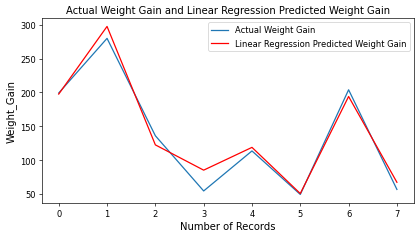

In [96]:
plt.figure(figsize =(8,4))
plt.title('Actual Weight Gain and Linear Regression Predicted Weight Gain')
plt.xlabel('Number of Records', fontsize = 12)
plt.ylabel('Weight_Gain', fontsize = 12)
plt.plot(Result['Weight_gain'])
plt.plot(Result['Linear Regression Prediction'],'r')
plt.legend(['Actual Weight Gain','Linear Regression Predicted Weight Gain'], loc = 'upper right')
plt.show()

In [97]:
# Create and train the Decision Tree Regressor
regressor = DecisionTreeRegressor(random_state=30)
tree_params = {"max_depth": range(1, 11), "max_features": range(2, 50)}
tree_grid = GridSearchCV(regressor, tree_params, cv=5, n_jobs=-1, verbose=True)

tree_grid.fit(X_train, y_train)

# Print the best hyperparameters and corresponding accuracy
print("Best Hyperparameters:", tree_grid.best_params_)
print("Best Accuracy:", tree_grid.best_score_)

# Train and evaluate the model with the best hyperparameters
best_dt = DecisionTreeRegressor(max_depth=tree_grid.best_params_['max_depth'],
                                 max_features=tree_grid.best_params_['max_features'])
best_dt.fit(X_train, y_train)
# Make predictions on the test set
y_pred = best_dt.predict(X_test)


Fitting 5 folds for each of 480 candidates, totalling 2400 fits
Best Hyperparameters: {'max_depth': 5, 'max_features': 17}
Best Accuracy: 0.9381137348746872


In [98]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the regression metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 491.98835555555564
R-squared: 0.9216939947800172


In [99]:
# print the real values
actual_weight = y_text_df
actual_weight_gain=actual_weight.reset_index()
to_predict = X_text_df
# we call the predict method
predictions = best_dt.predict(to_predict)
# print the predictions
predicted = pd.DataFrame(predictions)
predicted.rename(columns={0:'Descision Tree Regressor Prediction'}, inplace=True)
# print(predicted)
Result = pd.concat([actual_weight_gain,predicted], axis =1, join='inner')
result = Result.drop('index',axis = 1)
print(result)

   Weight_gain  Descision Tree Regressor Prediction
0      199.040                           172.120000
1      279.800                           307.460000
2      135.932                           175.328000
3       54.360                            55.588000
4      113.480                           139.148000
5       49.212                            55.588000
6      203.840                           200.520000
7       56.588                            70.081333


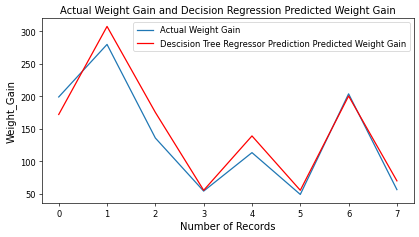

In [100]:
# visualize result of Decision Tree Regressor prediction
plt.figure(figsize =(8,4))
plt.title('Actual Weight Gain and Decision Regression Predicted Weight Gain')
plt.xlabel('Number of Records', fontsize = 12)
plt.ylabel('Weight_Gain', fontsize = 12)
plt.plot(Result['Weight_gain'])
plt.plot(Result['Descision Tree Regressor Prediction'],'r')
plt.legend(['Actual Weight Gain','Descision Tree Regressor Prediction Predicted Weight Gain'], loc = 'upper right')
plt.show()

In [101]:
# Create and train the K-Nearest Neighbors Regression model
knn_reg = KNeighborsRegressor() 

# Define the hyperparameter grid
param_grid = {'n_neighbors': np.arange(1, 20),
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1, 2]}

# Define the grid search object
knn_grid = GridSearchCV(knn_reg, param_grid, cv=5)

knn_grid.fit(X_train, y_train)

# Print the best hyperparameters and corresponding accuracy
print("Best Hyperparameters:", knn_grid.best_params_)
print("Best Accuracy:", knn_grid.best_score_)

# Train and evaluate the model with the best hyperparameters
best_knn = KNeighborsRegressor(n_neighbors=knn_grid.best_params_['n_neighbors'],
                                 weights=knn_grid.best_params_['weights'],
                                 algorithm=knn_grid.best_params_['algorithm'],
                                 p=knn_grid.best_params_['p'])
best_knn.fit(X_train, y_train)
# Make predictions on the test set
y_pred = best_knn.predict(X_test)

Best Hyperparameters: {'algorithm': 'auto', 'n_neighbors': 6, 'p': 2, 'weights': 'uniform'}
Best Accuracy: 0.9679765396241186


In [102]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the regression metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 740.4412223888886
R-squared: 0.8821496615300939


In [103]:
# print the real values
actual_weight = y_text_df
actual_weight_gain=actual_weight.reset_index()
to_predict = X_text_df
# we call the predict method
predictions = best_knn.predict(to_predict)
# print the predictions
predicted = pd.DataFrame(predictions)
predicted.rename(columns={0:'KNN Regressor Prediction'}, inplace=True)
# print(predicted)
Result = pd.concat([actual_weight_gain,predicted], axis =1, join='inner')
result = Result.drop('index',axis = 1)
print(result)

   Weight_gain  KNN Regressor Prediction
0      199.040                205.354667
1      279.800                286.933333
2      135.932                105.916000
3       54.360                105.934667
4      113.480                111.636667
5       49.212                 85.452667
6      203.840                214.881333
7       56.588                 85.452667


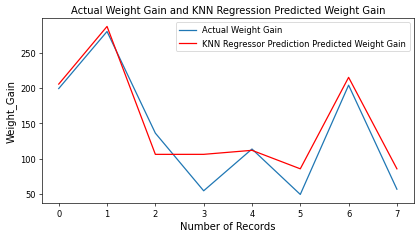

In [104]:
# visualize result of KNN Regressor prediction
plt.figure(figsize =(8,4))
plt.title('Actual Weight Gain and KNN Regression Predicted Weight Gain')
plt.xlabel('Number of Records', fontsize = 12)
plt.ylabel('Weight_Gain', fontsize = 12)
plt.plot(Result['Weight_gain'])
plt.plot(Result['KNN Regressor Prediction'],'r')
plt.legend(['Actual Weight Gain','KNN Regressor Prediction Predicted Weight Gain'], loc = 'upper right')
plt.show()

In [105]:
### Create a Pickle file
import pickle
#pickle_out = open("KNN_Tilapia_Earthen.pkl","wb")
#pickle.dump(best_knn, pickle_out)
#pickle_out.close()

In [106]:
import warnings
warnings.filterwarnings("ignore")
# Create and train the MLP Regression model
ann_reg = MLPRegressor(hidden_layer_sizes= (80,), random_state=42,
                       alpha = 0.0005, activation = 'relu', 
                       solver = 'adam', max_iter= 10000)

ann_reg.fit(X_train, y_train)

MLPRegressor(alpha=0.0005, hidden_layer_sizes=(80,), max_iter=10000,
             random_state=42)

In [107]:
# Make predictions on the test set
y_pred = ann_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the regression metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 79.22782326428846
R-squared: 0.987389916301788


In [108]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error
pred_train= ann_reg.predict(X_train)
print('mean_squared_error for Training: ',np.sqrt(mean_squared_error(y_train,pred_train)))
pred= ann_reg.predict(X_test)
print('mean_squared_error for Testing: ', np.sqrt(mean_squared_error(y_test,pred)))

mean_squared_error for Training:  1.5900209212879848
mean_squared_error for Testing:  8.90100125066211


In [109]:
# print the real values
actual_weight = y_text_df
actual_weight_gain=actual_weight.reset_index()
to_predict = X_text_df
# we call the predict method
predictions = ann_reg.predict(to_predict)
# print the predictions
predicted = pd.DataFrame(predictions)
predicted.rename(columns={0:'ANN Prediction'}, inplace=True)
# print(predicted)
Result = pd.concat([actual_weight_gain,predicted], axis =1, join='inner')
result = Result.drop('index',axis = 1)
print(result)

   Weight_gain  ANN Prediction
0      199.040      199.229570
1      279.800      280.027382
2      135.932      140.890574
3       54.360       52.901444
4      113.480      131.655775
5       49.212       60.521475
6      203.840      203.555224
7       56.588       68.781276


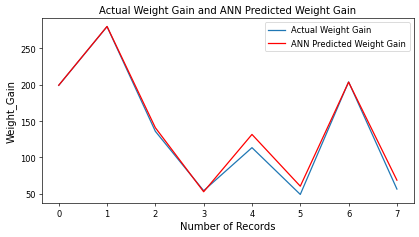

In [110]:
# visualize result of ANN prediction
plt.figure(figsize =(8,4))
plt.title('Actual Weight Gain and ANN Predicted Weight Gain')
plt.xlabel('Number of Records', fontsize = 12)
plt.ylabel('Weight_Gain', fontsize = 12)
plt.plot(Result['Weight_gain'])
plt.plot(Result['ANN Prediction'],'r')
plt.legend(['Actual Weight Gain','ANN Predicted Weight Gain'], loc = 'upper right')
plt.show()

In [111]:
# Save
import pickle
pickle_out = open("ANN_Tilapia_Con_ext.pkl","wb")
pickle.dump(ann_reg, pickle_out)
pickle_out.close()

In [38]:
from sklearn.ensemble import RandomForestRegressor
# Fitting Random Forest Regression to the dataset
RFregressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)
 
# Fit the regressor with x and y data
RFregressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, oob_score=True, random_state=0)

In [39]:
# Make predictions on the test set
y_pred = RFregressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the regression metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 136.53536140000006
R-squared: 0.9753223317829328


In [ ]:
from keras.models import Sequential
from keras.layers import Dense# Neural network
model = Sequential()
model.add(Dense(500, input_dim=4, activation= "relu"))
model.add(Dense(100, activation= "relu"))
model.add(Dense(50, activation= "relu"))
model.add(Dense(1))
model.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])
history = model.fit(X_train, y_train, batch_size = 1, validation_split=0.2, epochs= 3000)

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error
pred_train= model.predict(X_train)
print('mean_squared_error for Training: ',np.sqrt(mean_squared_error(y_train,pred_train)))
pred= model.predict(X_test)
print('mean_squared_error for Testing: ', np.sqrt(mean_squared_error(y_test,pred)))

In [ ]:
# "Loss"
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
# print the real values
actual_weight = y_text_df
actual_weight_gain=actual_weight.reset_index()
to_predict = X_text_df
# we call the predict method
predictions = model.predict(to_predict)
# print the predictions
predicted = pd.DataFrame(predictions)
predicted.rename(columns={0:'ANN Prediction'}, inplace=True)
# print(predicted)
Result = pd.concat([actual_weight_gain,predicted], axis =1, join='inner')
result = Result.drop('index',axis = 1)
print(result)

In [ ]:
# visualize result of ANN prediction
plt.figure(figsize =(8,4))
plt.title('Actual Weight Gain and ANN Predicted Weight Gain')
plt.xlabel('Number of Records', fontsize = 12)
plt.ylabel('Weight_Gain', fontsize = 12)
plt.plot(Result['Weight_gain'])
plt.plot(Result['ANN Prediction'],'r')
plt.legend(['Actual Weight Gain','ANN Predicted Weight Gain'], loc = 'upper right')
plt.show()